In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
from numpy import sqrt, argsort
from tqdm import tqdm, trange
from scipy.stats import norm

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
# load the data
data = pd.read_csv('DataSetForThesis2.csv')

del data["Discharge Flow (Nominal m3/hr)"]

# drop the second row
data = data.iloc[1:,:]

# check the missing values
print(f"Missing Values?: {data.isna().sum().any()}")

# drop the missing values
data.dropna(inplace=True)

print(f"Missing Values After Dropping?: {data.isna().sum().any()}")

# check the duplicates
print(f"Number Of Duplicates: {data.duplicated().sum()}")

print(" ")

# change the data type of the columns to float and date time 
cols=[i for i in data.columns if i not in ['Date/Time']]
for col in cols:
    data[col]=pd.to_numeric(data[col])
    
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

data.head()

Missing Values?: True
Missing Values After Dropping?: False
Number Of Duplicates: 0
 


,Date/Time,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC),Dischrage PreG1e without Atmospheric pressure),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm),Gear Box Output Shaft Drive End (DE) Y Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Input Shaft Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Drive End (DE) X Vibration (μm),Gear Box Input Shaft Drive End (DE) Y Vibration (μm),Suction Vibration in x,Suction Vibration in y,Discharge Vibration in x,Discharge Vibration in y,Compressor speed (RPM)
1,2020-11-07 00:00:00,5.2,26812.4,28.5,7.4,55.2,3.0,4.0,5.0,6.8,6.6,6.60,6.9,7.4,9.727419,10.204235,7.166746,9.235712,8164.449219
2,2020-11-07 00:20:00,5.2,26836.2,28.4,7.4,55.2,3.0,4.0,5.1,7.0,6.7,6.54,6.8,7.5,9.721112,10.209536,7.135931,9.235712,8161.888184
3,2020-11-07 00:40:00,5.2,26856.7,28.3,7.4,55.2,3.1,4.0,5.3,7.3,6.7,6.46,5.7,7.4,9.714805,10.214835,7.105114,9.178102,8162.304688
4,2020-11-07 01:00:00,5.2,26800.2,28.2,7.4,55.2,3.1,4.0,5.1,7.1,6.8,6.49,7.6,7.4,9.708497,10.220136,7.074298,9.116689,8315.385742
5,2020-11-07 01:20:00,5.2,26852.4,28.1,7.4,55.3,3.1,4.2,5.0,6.7,6.7,6.61,7.6,7.5,9.702189,10.225435,7.043482,9.139559,8217.386719


In [3]:
data.shape

(26281, 19)

In [4]:
data.describe()

,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC),Dischrage PreG1e without Atmospheric pressure),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm),Gear Box Output Shaft Drive End (DE) Y Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Input Shaft Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Drive End (DE) X Vibration (μm),Gear Box Input Shaft Drive End (DE) Y Vibration (μm),Suction Vibration in x,Suction Vibration in y,Discharge Vibration in x,Discharge Vibration in y,Compressor speed (RPM)
count,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000
mean,5.412393,26703.532210,31.959800,7.550869,35.472535,1.230273,1.349290,1.523477,1.880644,1.867163,1.716900,1.895754,1.908607,2.667629,2.821585,2.167127,2.587514,1792.939593
std,0.221730,1183.433804,6.473019,0.354624,11.250671,0.906153,1.309373,1.706823,2.505061,2.361313,2.209064,2.339398,2.440810,3.481282,3.772495,2.480194,3.224359,3041.285661
min,4.700000,140.200000,13.100000,5.200000,11.600000,0.000000,0.500000,0.400000,0.400000,0.200000,0.270000,0.300000,0.300000,0.856250,0.659801,0.906404,0.707415,0.000000
25%,5.300000,26552.300000,25.800000,7.300000,27.400000,0.800000,0.700000,0.700000,0.600000,0.700000,0.670000,0.700000,0.700000,0.929175,0.956760,0.924105,0.977089,0.000000
50%,5.400000,26684.200000,33.000000,7.500000,34.200000,0.900000,0.700000,0.700000,0.700000,0.700000,0.700000,0.800000,0.700000,0.956760,0.956760,0.956760,1.009405,0.000000
75%,5.500000,26830.400000,37.100000,7.700000,40.700000,0.900000,0.700000,0.700000,0.700000,0.700000,0.720000,0.800000,0.700000,0.956760,0.988632,0.956760,1.009405,2469.389648
max,7.500000,30099.900000,51.700000,10.500000,72.600000,10.900000,5.300000,7.500000,10.400000,9.000000,10.490000,10.100000,8.300000,10.315174,11.301513,17.342442,11.304877,9635.175781


# Code #1: Correlation Matrix

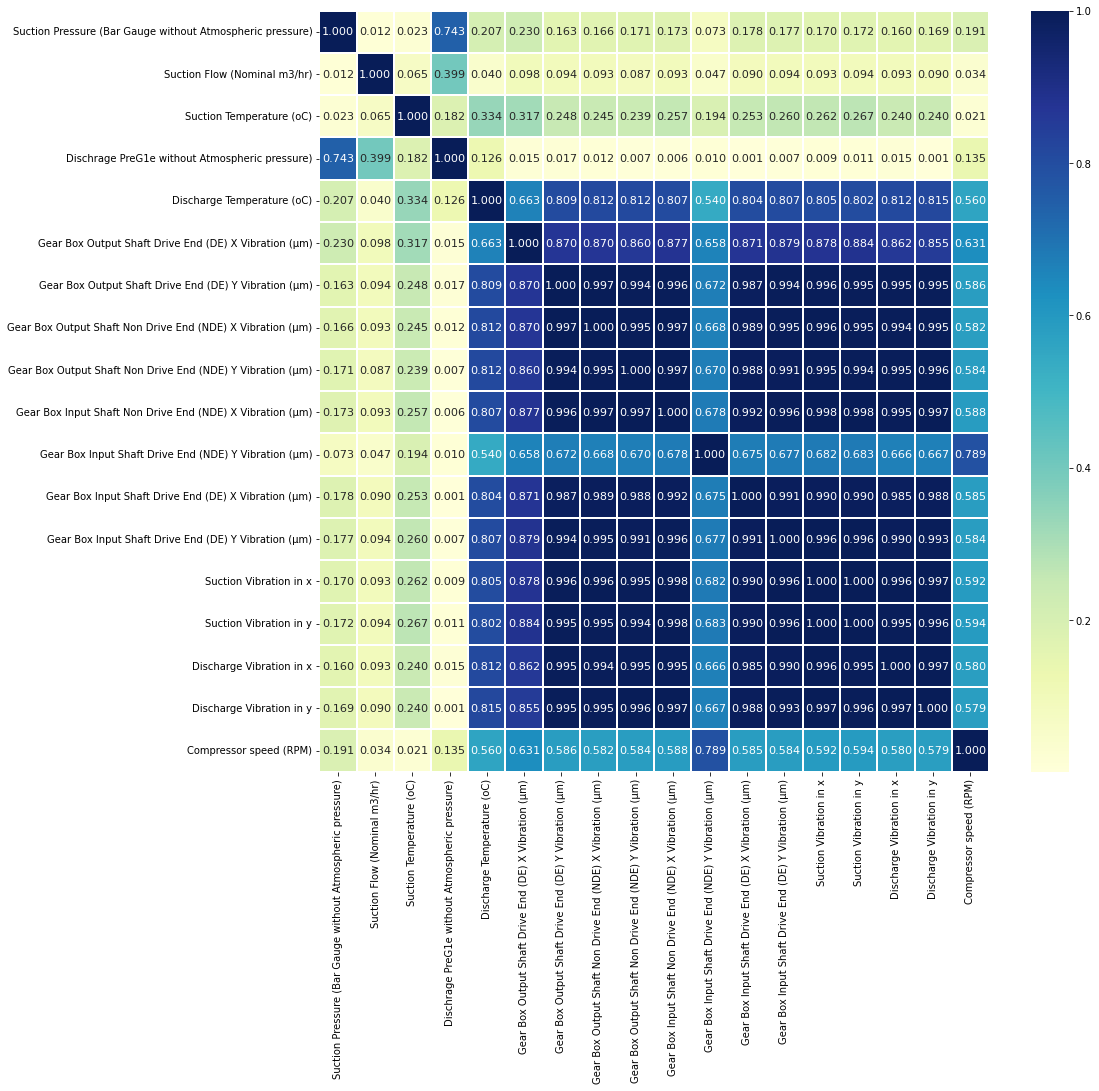

In [5]:
anno_size=11.2


corrmat = np.abs(data.corr())
  
f, ax = plt.subplots(figsize =(15, 14))
sns.heatmap(corrmat,annot=True, ax = ax, cmap ="YlGnBu", fmt='.3f', linewidths = 0.1, annot_kws={'size':anno_size})
plt.savefig("correlation_heatmap.png")

# Code #2: Grid Correlation Matrix

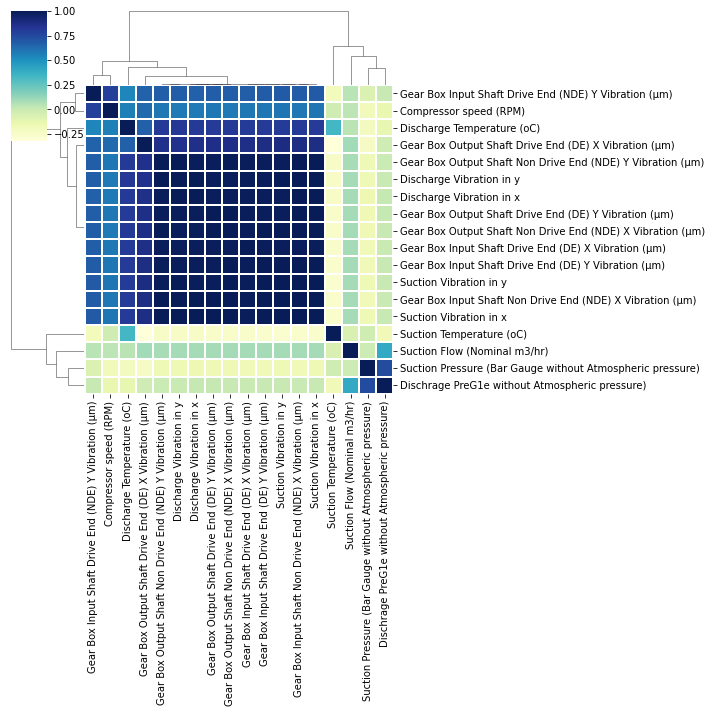

In [6]:
corrmat = data.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
cg

# Code #3: Correlation for a single variable

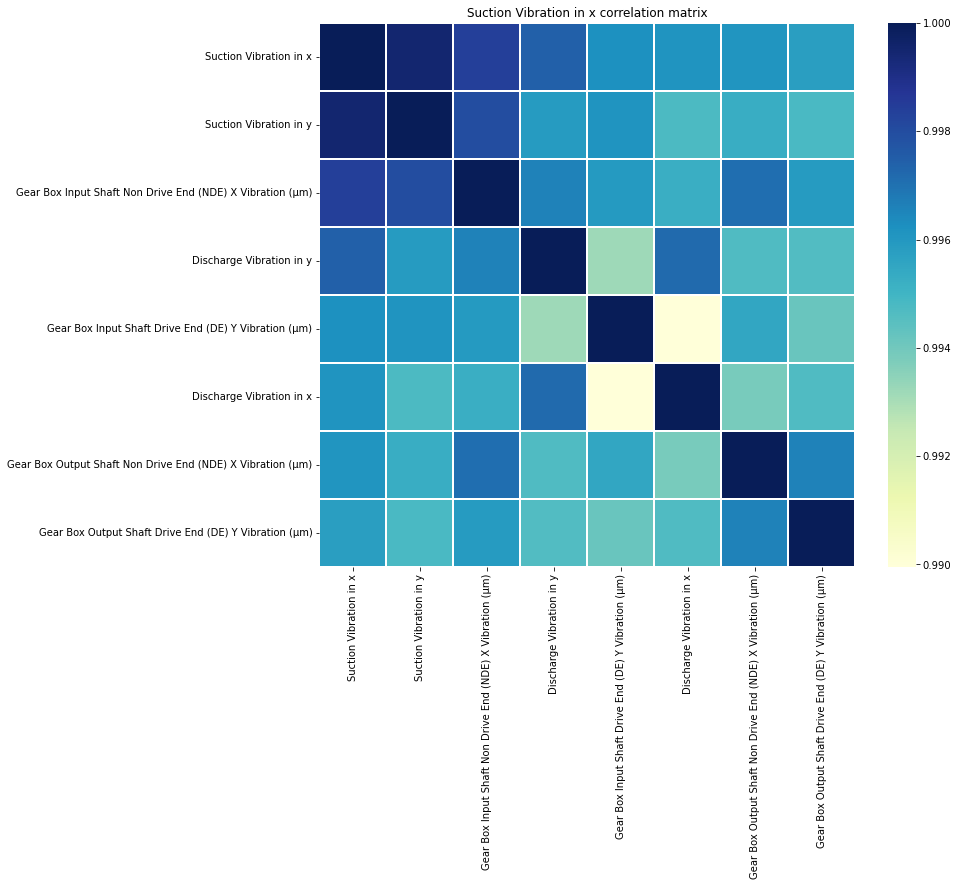

In [7]:
target='Suction Vibration in x'

# k : number of variables for heatmap
k = 8
  
cols = corrmat.nlargest(k, target)[target].index
  
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10))

plt.title(f"{target} correlation matrix");
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values, 
                              xticklabels = cols.values);

[Source: Exploring Correlation in Python](https://www.geeksforgeeks.org/exploring-correlation-in-python/)

In [8]:
corr_matrix = data.corr().values
print(np.array(corr_matrix))

[[ 1.         -0.01237471 -0.02318392  0.74265421 -0.20706981 -0.22953645
  -0.16314246 -0.16610659 -0.17113726 -0.17314596 -0.07346975 -0.17824459
  -0.17729996 -0.17023735 -0.17238276 -0.15981448 -0.16869452 -0.19091213]
 [-0.01237471  1.         -0.06527655  0.39942855  0.04037226  0.09760923
   0.09360607  0.09286556  0.08650019  0.09262211  0.04710968  0.09002949
   0.09372035  0.09344054  0.09387625  0.09300064  0.09000733  0.03418194]
 [-0.02318392 -0.06527655  1.         -0.18203173  0.33391369 -0.3165392
  -0.24836147 -0.24483942 -0.23857534 -0.25731169 -0.19399416 -0.25291265
  -0.25999554 -0.26167452 -0.26738137 -0.24004899 -0.23954903 -0.02118965]
 [ 0.74265421  0.39942855 -0.18203173  1.         -0.12594728 -0.01451902
   0.01662283  0.01177195 -0.00697177  0.00615553  0.00971722 -0.00117525
   0.00749471  0.00916317  0.01072586  0.01462371  0.00143643 -0.13541013]
 [-0.20706981  0.04037226  0.33391369 -0.12594728  1.          0.66318812
   0.80875232  0.81182987  0.812335

<AxesSubplot:>

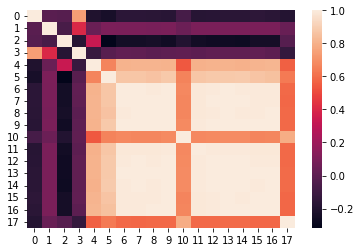

In [9]:
sns.heatmap(corr_matrix)

In [10]:
from tabulate import tabulate
print(tabulate(corr_matrix))

----------  ----------  ----------  -----------  ----------  ----------  ----------  ----------  -----------  -----------  -----------  -----------  -----------  -----------  ----------  ----------  -----------  ----------
 1          -0.0123747  -0.0231839   0.742654    -0.20707    -0.229536   -0.163142   -0.166107   -0.171137    -0.173146    -0.0734698   -0.178245    -0.1773      -0.170237    -0.172383   -0.159814   -0.168695    -0.190912
-0.0123747   1          -0.0652766   0.399429     0.0403723   0.0976092   0.0936061   0.0928656   0.0865002    0.0926221    0.0471097    0.0900295    0.0937203    0.0934405    0.0938763   0.0930006   0.0900073    0.0341819
-0.0231839  -0.0652766   1          -0.182032     0.333914   -0.316539   -0.248361   -0.244839   -0.238575    -0.257312    -0.193994    -0.252913    -0.259996    -0.261675    -0.267381   -0.240049   -0.239549    -0.0211896
 0.742654    0.399429   -0.182032    1           -0.125947   -0.014519    0.0166228   0.0117719  -0.00697177 

In [11]:
corr_matrix2 = pd.DataFrame(corr_matrix)
print(corr_matrix2)

          0         1         2         3         4         5         6   \
0   1.000000 -0.012375 -0.023184  0.742654 -0.207070 -0.229536 -0.163142   
1  -0.012375  1.000000 -0.065277  0.399429  0.040372  0.097609  0.093606   
2  -0.023184 -0.065277  1.000000 -0.182032  0.333914 -0.316539 -0.248361   
3   0.742654  0.399429 -0.182032  1.000000 -0.125947 -0.014519  0.016623   
4  -0.207070  0.040372  0.333914 -0.125947  1.000000  0.663188  0.808752   
5  -0.229536  0.097609 -0.316539 -0.014519  0.663188  1.000000  0.869804   
6  -0.163142  0.093606 -0.248361  0.016623  0.808752  0.869804  1.000000   
7  -0.166107  0.092866 -0.244839  0.011772  0.811830  0.870110  0.996623   
8  -0.171137  0.086500 -0.238575 -0.006972  0.812335  0.859787  0.993627   
9  -0.173146  0.092622 -0.257312  0.006156  0.806683  0.877007  0.995901   
10 -0.073470  0.047110 -0.193994  0.009717  0.540330  0.658078  0.672074   
11 -0.178245  0.090029 -0.252913 -0.001175  0.803704  0.871388  0.987310   
12 -0.177300

In [12]:
from prettytable import PrettyTable
x = PrettyTable()
#x.field_names = ["col1", "col2", "col3"]
for row in corr_matrix:
    x.add_row(row)
print(x)

+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+-----------------------+----------------------+----------------------+-----------------------+----------------------+----------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+
|        Field 1        |        Field 2        |        Field 3        |        Field 4        |       Field 5        |        Field 6        |       Field 7        |       Field 8        |        Field 9        |       Field 10       |       Field 11       |        Field 12       |       Field 13       |       Field 14       |       Field 15       |       Field 16       |       Field 17       |        Field 18       |
+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+-----------------------+--------

In [13]:
correlation=pd.read_csv("correlation analysis.csv")
correlation=correlation.iloc[0:18]
correlation

,Unnamed: 0,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC),Dischrage PreG1e without Atmospheric pressure),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm),Gear Box Output Shaft Drive End (DE) Y Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Input Shaft Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Drive End (DE) X Vibration (μm),Gear Box Input Shaft Drive End (DE) Y Vibration (μm),Suction Vibration in x,Suction Vibration in y,Discharge Vibration in x,Discharge Vibration in y,Compressor speed (RPM)
0,Suction Pressure (Bar Gauge without Atmospheri...,1.000,-0.012,-0.023,0.743,-0.207,-0.230,-0.163,-0.166,-0.171,-0.173,-0.073,-0.178,-0.177,-0.170,-0.172,-0.160,-0.169,-0.191
1,Suction Flow (Nominal m3/hr),-0.012,1.000,-0.065,0.399,0.040,0.098,0.094,0.093,0.087,0.093,0.047,0.090,0.094,0.093,0.094,0.093,0.090,0.034
2,Suction Temperature (oC),-0.023,-0.065,1.000,-0.182,0.334,-0.317,-0.248,-0.245,-0.239,-0.257,-0.194,-0.253,-0.260,-0.262,-0.267,-0.240,-0.240,-0.021
3,Dischrage PreG1e without Atmospheric pressure),0.743,0.399,-0.182,1.000,-0.126,-0.015,0.017,0.012,-0.007,0.006,0.010,-0.001,0.007,0.009,0.011,0.015,0.001,-0.135
4,Discharge Temperature (oC),-0.207,0.040,0.334,-0.126,1.000,0.663,0.809,0.812,0.812,0.807,0.540,0.804,0.807,0.805,0.802,0.812,0.815,0.560
5,Gear Box Output Shaft Drive End (DE) X Vibrati...,-0.230,0.098,-0.317,-0.015,0.663,1.000,0.870,0.870,0.860,0.877,0.658,0.871,0.879,0.878,0.884,0.862,0.855,0.631
6,Gear Box Output Shaft Drive End (DE) Y Vibrati...,-0.163,0.094,-0.248,0.017,0.809,0.870,1.000,0.997,0.994,0.996,0.672,0.987,0.994,0.996,0.995,0.995,0.995,0.586
7,Gear Box Output Shaft Non Drive End (NDE) X Vi...,-0.166,0.093,-0.245,0.012,0.812,0.870,0.997,1.000,0.995,0.997,0.668,0.989,0.995,0.996,0.995,0.994,0.995,0.582
8,Gear Box Output Shaft Non Drive End (NDE) Y Vi...,-0.171,0.087,-0.239,-0.007,0.812,0.860,0.994,0.995,1.000,0.997,0.670,0.988,0.991,0.995,0.994,0.995,0.996,0.584
9,Gear Box Input Shaft Non Drive End (NDE) X Vib...,-0.173,0.093,-0.257,0.006,0.807,0.877,0.996,0.997,0.997,1.000,0.678,0.992,0.996,0.998,0.998,0.995,0.997,0.588


<AxesSubplot:>

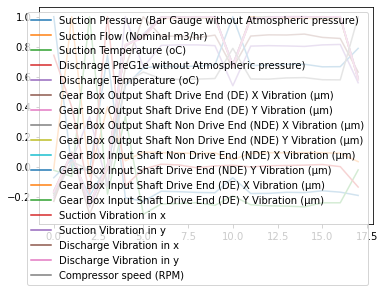

In [14]:
correlation.plot()